In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("./data.csv")
df.head(5)

,Equipo,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,...,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


# Data Wrangling

* Verificar Valores Nulos

In [16]:
valores_nulos_por_columna=df.isnull().sum()
print("\tValores  nulos por columna:\n")
valores_nulos_por_columna


	Valores  nulos por columna:



Equipo                          0
Nombre                          0
Posicion                        0
Altura                          0
Edad                            0
Apariciones                     0
Goles                           0
Asistencias                     0
Tarjetas Amarillas              0
2da Tarjeta Amarillas           0
Tarjetas Rojas                  0
Goles Concedidos                0
Valla Invicta                   0
Minutos Jugados                 0
Dias De baja por Lesion         0
Partidos Perdidos por Lesion    0
Premios                         0
Valor Actual                    0
Valor Maximo                    0
Posicion Numero                 0
Extremo                         0
dtype: int64

* Verficar Valores Faltantes por filas

In [18]:
print("Valores faltantes por fila:")
# esto es buscar  valores que estan faltando en una fila, por eso axis --> 1
df.index[df.isnull().any(axis=1)]


# el resultado es una lista vacia, ergo, no hay valores  faltantes por filas

Valores faltantes por fila:


Int64Index([], dtype='int64')

* Otra alternativa de verificar valores NAN

In [25]:
# Encontrar filas con valores faltantes (NaN)
# aca otra forma de demostrar que no hay valores Nan, ya que el tamaño coincide con el original
missing_rows = df.dropna(how='all')
print("Voy a comparar el tamaño una vez eliminando los valores Nan")
print(f"Tamaño original del df-->  {df.shape}")
print(f"Tamaño del df una vez aplicado el metodo de eliminar los valores NAN --> {missing_rows.shape}")


Voy a comparar el tamaño una vez eliminando los valores Nan
Tamaño original del df-->  (10754, 21)
Tamaño del df una vez aplicado el metodo de eliminar los valores NAN --> (10754, 21)


In [27]:
# Identificar y mostrar los valores duplicados
# creo una lista  para guadar valores duplicados, con el metodo duplicated
duplicados = df[df.duplicated()]
print("Valores duplicados:")
print(duplicados)
# conclusion no hay valores duplicados.

Valores duplicados:
Empty DataFrame
Columns: [Equipo, Nombre, Posicion, Altura, Edad, Apariciones, Goles, Asistencias, Tarjetas Amarillas, 2da Tarjeta Amarillas, Tarjetas Rojas, Goles Concedidos, Valla Invicta, Minutos Jugados, Dias De baja por Lesion, Partidos Perdidos por Lesion, Premios, Valor Actual, Valor Maximo, Posicion Numero, Extremo]
Index: []

[0 rows x 21 columns]


In [39]:
# descripcion estadistica
df.describe()

,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,Tarjetas Rojas,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [43]:
# descripcion de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Equipo                        10754 non-null  object 
 1   Nombre                        10754 non-null  object 
 2   Posicion                      10754 non-null  object 
 3   Altura                        10754 non-null  float64
 4   Edad                          10754 non-null  int32  
 5   Apariciones                   10754 non-null  int64  
 6   Goles                         10754 non-null  float64
 7   Asistencias                   10754 non-null  float64
 8   Tarjetas Amarillas            10754 non-null  float64
 9   2da Tarjeta Amarillas         10754 non-null  float64
 10  Tarjetas Rojas                10754 non-null  float64
 11  Goles Concedidos              10754 non-null  float64
 12  Valla Invicta                 10754 non-null  float64
 13  M

*  Transformación de datos , hay una columna, llamada edad, que es mejor, tenerla como dato entero.

In [42]:
# Convertir columnas a tipos de datos adecuados si es necesario
df['Edad'] = df['Edad'].astype(int)


* En la siguiente celda, se trata de analizar los datos Outliers de las columnas a priori mas importanes.
* Los valores outliers, que se  consideran como tales,  en este ambito de futbol, podrian considerarse dentro de lo normal.
* Un tal Leonel Messi, hizo 92 en un año.

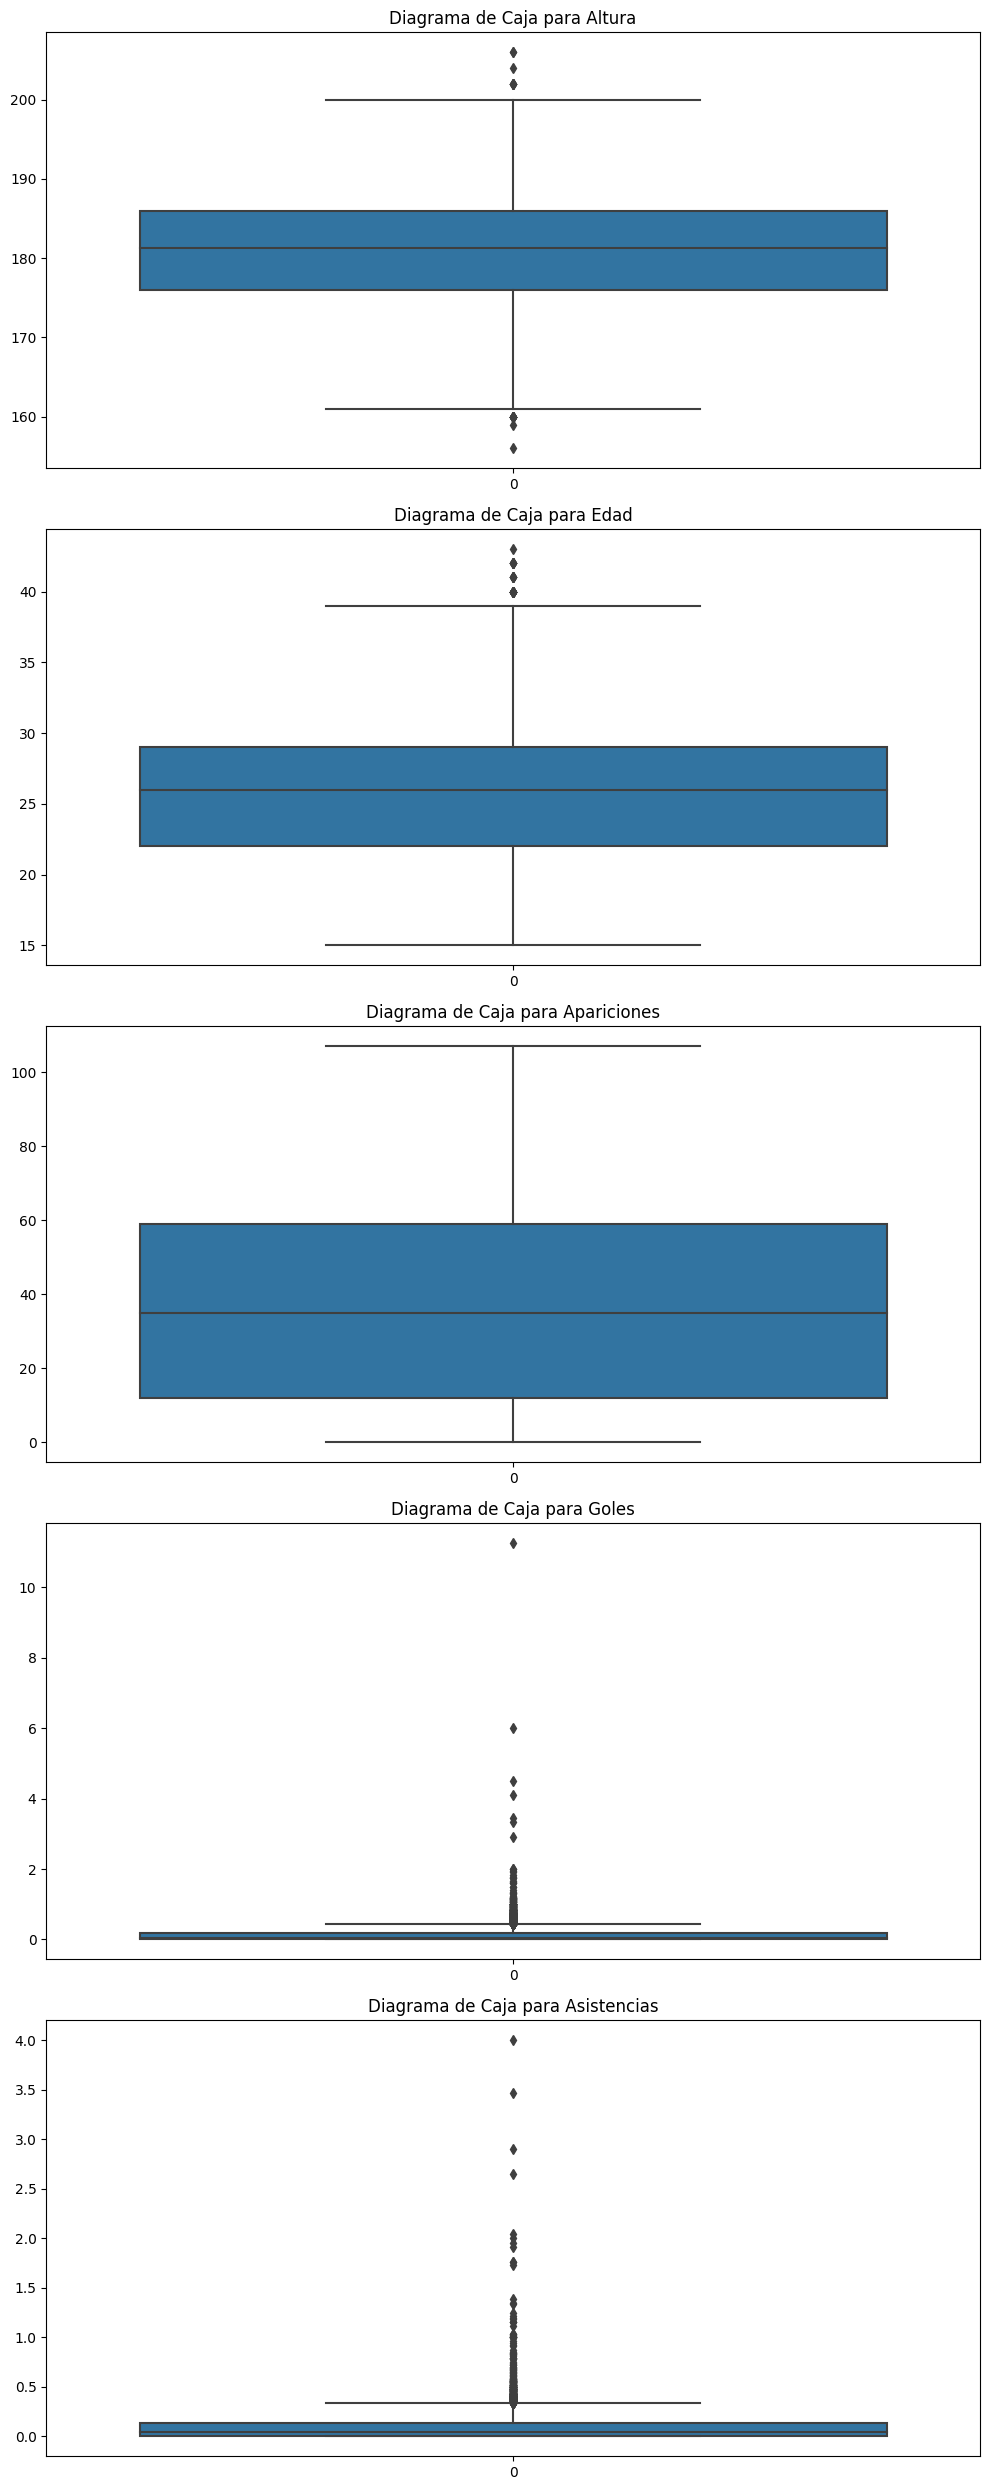

In [45]:
# Elijo las columnas que considero mas relevantes
columnas_analisis = ['Altura', 'Edad', 'Apariciones', 'Goles', 'Asistencias']

# Creo subplots para cada columna
fig, axs = plt.subplots(len(columnas_analisis), 1, figsize=(10, len(columnas_analisis) * 5))

# Recorro con un for las columnas para hacer menos lineas de codigo
for i, columna in enumerate(columnas_analisis):
    sns.boxplot(data=df[columna], ax=axs[i])
    axs[i].set_title(f'Diagrama de Caja para {columna}')

plt.tight_layout()
plt.show()